In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('./data_zu_mai.csv')
data_pred = pd.read_csv('./graph_data_and_predictions_zu_mai.csv')

In [5]:
data_total = pd.concat([data,data_pred[['Train Mask','Val Mask','Test Mask','Model Predictions']]],axis=1)
data_total_train = data_total[data_total['Train Mask']]
data_total_val = data_total[data_total['Val Mask']]
data_total_test = data_total[data_total['Test Mask']]

In [6]:
def getTP(row):
    label = row['Label']
    pred = row['Model Predictions']
    if label == 1 and pred == 1:
        return True
    else:
        return False

def getFP(row):
    label = row['Label']
    pred = row['Model Predictions']
    if label == 0 and pred == 1:
        return True
    else:
        return False

data_total_test_TP = data_total_test[data_total_test.apply(getTP, axis=1)]
data_total_test_FP = data_total_test[data_total_test.apply(getFP, axis=1)]

   'XB': '性别',二项分布检验
   
   'FWMJ': '房屋面积', Mann-Whitney-U检验
   
   'CZMJ': '出租面积', Mann-Whitney-U检验
   
   'YZJ': '月租金', F检验  
   
   "RentType": "出租类型",二项分布检验
   
   'Age': '年龄',①配对样本Wilcoxon检验
   
   "RenterAge": "租房时年龄",①配对样本Wilcoxon检验
   
   "MonthlyRentUnitArea":"单位面积月租金"，F检验
   
   "In_Province":"原四川省居民",二项分布检验
   
   "In_City":"原成都市居民",二项分布检验

In [10]:
feature_dict = {
    'XB': '性别',
    "RentType": "出租类型",
    "In_Province":"原四川省居民",
    "In_City":"原成都市居民"
}

def test(feature):
    feature_name = feature_dict[feature]
    sns.kdeplot(data=data_total_test_TP[feature], label='True Positive', color='blue', alpha=0.5)
    sns.kdeplot(data=data_total_test_FP[feature], label='False Positive', color='orange', alpha=0.5)
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()
    
    p_value = stats.binom_test(sum(data_total_test_TP[feature]), n=len(data_total_test_TP[feature]), p=sum(data_total_test_FP[feature]) / len(data_total_test_FP[feature]))
    print("二项分布检验（{}）：".format(feature_name))
    print("p-value =", p_value)


##############################


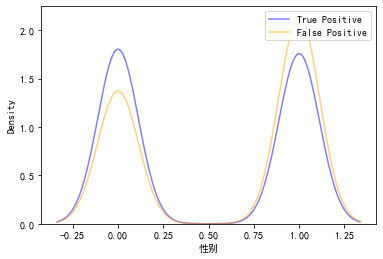

二项分布检验（性别）：
p-value = 3.6555915005636824e-23
##############################


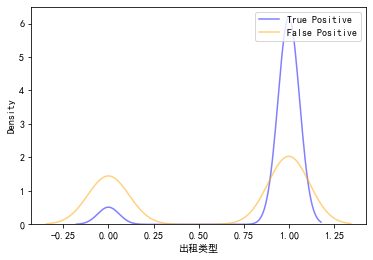

二项分布检验（出租类型）：
p-value = 4.348201590096245e-229
##############################


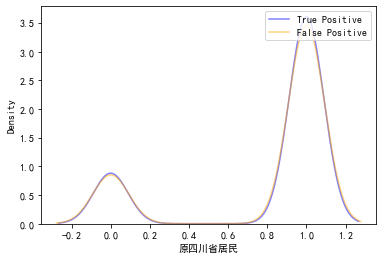

二项分布检验（原四川省居民）：
p-value = 0.9053685671828082
##############################


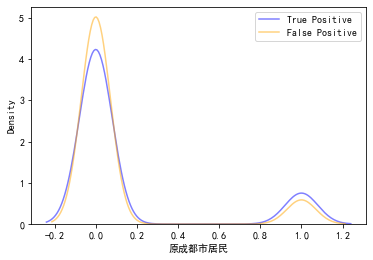

二项分布检验（原成都市居民）：
p-value = 1.7561037423904249e-09


In [11]:
for i in ['XB', 'RentType',"In_Province","In_City"]:
    print("#"*30)
    test(i)

In [14]:
feature_dict = {
    'FWMJ': '房屋面积',
    'CZMJ': '出租面积',    
}

def test(feature):
    feature_name = feature_dict[feature]
    sns.kdeplot(data=data_total_test_TP[feature], label='True Positive', color='blue', alpha=0.5)
    sns.kdeplot(data=data_total_test_FP[feature], label='False Positive', color='orange', alpha=0.5)
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()

    t_stat, p_value = stats.mannwhitneyu(data_total_test_TP[feature], data_total_test_FP[feature])
    print("Mann-Whitney-U检验（{}）：".format(feature_name))
    print("Statistic =", t_stat)
    print("p-value =", p_value)

##############################


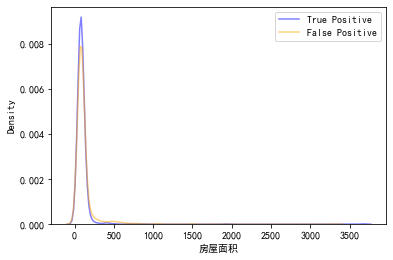

Mann-Whitney-U检验（房屋面积）：
Statistic = 1199065.0
p-value = 9.026238995808995e-06
##############################


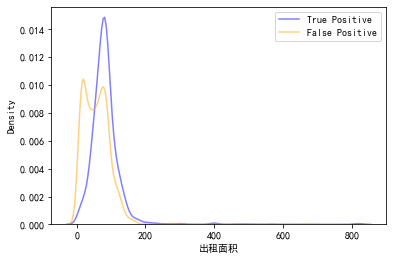

Mann-Whitney-U检验（出租面积）：
Statistic = 1816386.0
p-value = 2.2181234716057116e-77


In [15]:
for i in ['FWMJ', 'CZMJ']:
    print("#"*30)
    test(i)

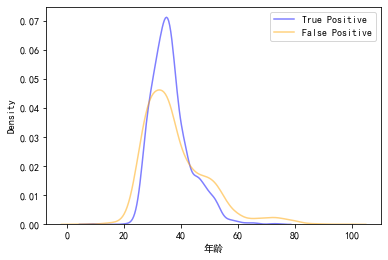

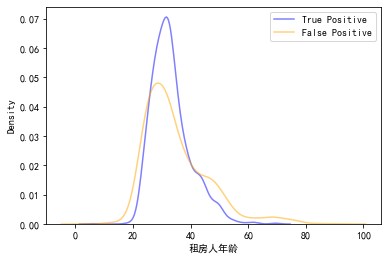

TPR 配对Wilcoxon统计值和P-value:
统计值: 0.0
P-value: 7.013768395037425e-300

FPR 配对Wilcoxon统计值和P-value:
统计值: 0.0
P-value: 7.65042533885148e-248


In [17]:
feature_dict = {
    'Age': '年龄',
    "RenterAge": "租房人年龄",
}

sns.kdeplot(data=data_total_test_TP['Age'], label='True Positive', color='blue', alpha=0.5)
sns.kdeplot(data=data_total_test_FP['Age'], label='False Positive', color='orange', alpha=0.5)
plt.xlabel('年龄')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

sns.kdeplot(data=data_total_test_TP['RenterAge'], label='True Positive', color='blue', alpha=0.5)
sns.kdeplot(data=data_total_test_FP['RenterAge'], label='False Positive', color='orange', alpha=0.5)
plt.xlabel('租房人年龄')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

# 假设你有一对TPR数据集和一对FPR数据集
TPR_pair = list(zip(data_total_test_TP['RenterAge'],data_total_test_TP['Age']))
FPR_pair = list(zip(data_total_test_FP['RenterAge'],data_total_test_FP['Age']))

# 使用配对Wilcoxon检验
statistic_TPR, p_value_TPR = stats.wilcoxon([pair[0] for pair in TPR_pair], [pair[1] for pair in TPR_pair])
statistic_FPR, p_value_FPR = stats.wilcoxon([pair[0] for pair in FPR_pair], [pair[1] for pair in FPR_pair])

print("TPR 配对Wilcoxon统计值和P-value:")
print("统计值:", statistic_TPR)
print("P-value:", p_value_TPR)

print("\nFPR 配对Wilcoxon统计值和P-value:")
print("统计值:", statistic_FPR)
print("P-value:", p_value_FPR)

In [18]:
feature_dict = {
    'YZJ': '月租金',
    "MonthlyRentUnitArea":"单位面积月租金"
}

def test(feature):
    feature_name = feature_dict[feature]
    sns.kdeplot(data=data_total_test_TP[feature], label='True Positive', color='blue', alpha=0.5)
    sns.kdeplot(data=data_total_test_FP[feature], label='False Positive', color='orange', alpha=0.5)
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()

    t_stat, p_value = stats.f_oneway(data_total_test_TP[feature], data_total_test_FP[feature])
    print("F检验（{}）：".format(feature_name))
    print("Statistic =", t_stat)
    print("p-value =", p_value)

####################


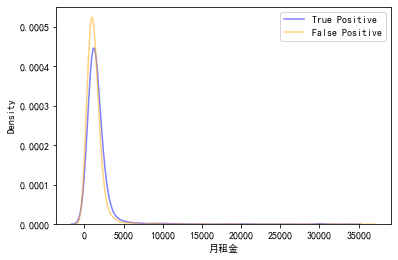

F检验（月租金）：
Statistic = 30.680014618718975
p-value = 3.284268828875802e-08
####################


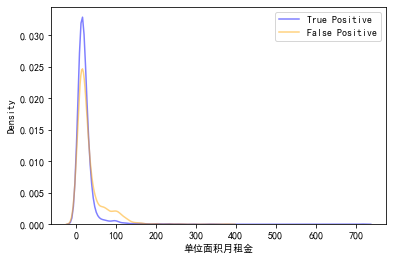

F检验（单位面积月租金）：
Statistic = 64.83736486274786
p-value = 1.129124657165296e-15


In [19]:
for i in ['YZJ', 'MonthlyRentUnitArea']:
    print("#"*20)
    test(i)